# Laptop Price Prediction

The dataset contains information about different laptop models, their configurations, and corresponding prices.
 
The goal is to predict the price of a laptop based on its configuration.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', 100)

In [94]:
# Load the dataset
df = pd.read_csv('laptop_data.csv')

### EDA - Exploratory Data Analysis

In [95]:
df.sample(20)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
62,62,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.7kg,31914.7200
402,402,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 550,Windows 10,2.1kg,60978.9600
106,106,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows 10,1.85kg,22105.8720
367,367,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,No OS,2.4kg,43103.5200
403,403,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Linux,2.5kg,46833.1200
121,121,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1070,Windows 10,1.8kg,119427.1200
856,856,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,23922.7200
1006,1006,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,64202.4000
273,273,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.36kg,133146.7200
293,293,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2kg,97449.1200


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [97]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [98]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [99]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [100]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [101]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [102]:
df.shape

(1303, 12)

### Feature Engineering

In [103]:
cols = df.columns.tolist()
price_index = cols.index('Price')
new_cols = [cols[price_index]] + cols[:price_index] + cols[price_index+1:]
df = df[new_cols]

In [104]:
df.Ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [105]:
df.Ram = df.Ram.str.replace('GB','').astype('Int64')

In [106]:
df.Ram.unique()

<IntegerArray>
[8, 16, 4, 2, 12, 6, 32, 24, 64]
Length: 9, dtype: Int64

In [107]:
df.Weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [108]:
df = df[df['Weight'] != '1TB']

In [109]:
df.Weight = df.Weight.str.replace('kg','').astype('float')

In [110]:
df.Weight.unique()

array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 0.98 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 ,
       1.89 , 1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 ,
       3.2  , 0.69 , 1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  ,
       1.9  , 3.   , 1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 ,
       1.25 , 1.5  , 2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 1.26 , 2.16 ,
       2.36 , 2.05 , 1.32 , 1.75 , 0.97 , 2.9  , 2.56 , 1.48 , 1.74 ,
       1.1  , 1.56 , 2.03 , 1.05 , 4.4  , 1.29 , 1.95 , 2.06 , 1.12 ,
       1.42 , 3.49 , 3.35 , 2.23 , 4.42 , 2.69 , 2.37 , 4.7  , 3.6  ,
       2.08 , 4.3  , 1.68 , 1.41 , 4.14 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.84 , 2.6  , 2.26 , 3.25 , 1.59 , 1.13 , 1.78 , 1.15 ,
       1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 , 1.47 , 3.78 , 1.79 ,
       0.91 , 1.99 , 4.33 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 , 1.94 ,
       1.24 , 4.6  ,

In [111]:
df.Cpu.nunique()

118

In [112]:
df.Gpu.nunique()

110

In [113]:
df.Memory.nunique()

39

In [114]:
df.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [115]:
df.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [116]:
df['Memory'] = df['Memory'].str.replace('Flash Storage', 'Flash_Storage')
df[['Memory1', 'Memory2']] = df['Memory'].str.split('+', expand=True)

In [117]:
df['Memory1'].nunique()

30

In [118]:
df['Memory2'].nunique()

6

In [119]:
df.Memory1 = df.Memory1.str.strip()
df.Memory1.nunique()

24

In [120]:
df.Memory2 = df.Memory2.str.strip()
df.Memory2.unique()

array([None, '1TB HDD', '256GB SSD', '2TB HDD', '500GB HDD', '512GB SSD',
       '1.0TB Hybrid'], dtype=object)

In [121]:
df[['Memory1Size', 'Memory1Type']] = df['Memory1'].str.split(' ', expand=True)
df[['Memory2Size', 'Memory2Type']] = df['Memory2'].str.split(' ', expand=True)

In [122]:
df.Memory2Size.unique()

array([None, '1TB', '256GB', '2TB', '500GB', '512GB', '1.0TB'],
      dtype=object)

In [123]:
# Convert TB to GB
def convert_tb_to_gb(storage):
    if storage == None:
        return None
    if 'TB' in storage:
        num = float(storage.split('TB')[0].replace(' ', '')) * 1000
        storage = f'{int(num)}GB' + storage.split('TB')[1]
    return storage

df['Memory1Size'] = df['Memory1Size'].apply(convert_tb_to_gb)
df['Memory2Size'] = df['Memory2Size'].apply(convert_tb_to_gb)

In [124]:
df['Memory2Size'].unique()

array([None, '1000GB', '256GB', '2000GB', '500GB', '512GB'], dtype=object)

In [125]:
df['Memory2Size'].replace({None: np.nan}, inplace=True)
df['Memory2Type'].replace({None: np.nan}, inplace=True)

df['Memory2Size'].fillna("0GB", inplace=True)

In [126]:
df['Memory2Size'].unique()

array(['0GB', '1000GB', '256GB', '2000GB', '500GB', '512GB'], dtype=object)

In [127]:
df['Memory1Size'] = df['Memory1Size'].str.replace('GB', '').astype('float')

In [128]:
df['Memory2Size'] = df['Memory2Size'].str.replace('GB', '').astype('float')

In [129]:
df = df.drop(['Memory','Memory1', 'Memory2'], axis=1)

In [130]:
df = df.drop('Unnamed: 0', axis=1)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1303 non-null   float64
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   Int64  
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Memory1Size       1303 non-null   float64
 11  Memory1Type       1303 non-null   object 
 12  Memory2Size       1303 non-null   float64
 13  Memory2Type       208 non-null    object 
dtypes: Int64(1), float64(5), object(8)
memory usage: 143.9+ KB


In [132]:
df.Ram = df.Ram.astype('int64')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1303 non-null   float64
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Memory1Size       1303 non-null   float64
 11  Memory1Type       1303 non-null   object 
 12  Memory2Size       1303 non-null   float64
 13  Memory2Type       208 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 142.6+ KB


In [134]:
df.corr(numeric_only=True)

,Price,Inches,Ram,Weight,Memory1Size,Memory2Size
Price,1.000000,0.068197,0.743007,0.210370,-0.122365,0.295004
Inches,0.068197,1.000000,0.237993,0.827631,0.269511,0.386670
Ram,0.743007,0.237993,1.000000,0.383874,0.018271,0.391826
Weight,0.210370,0.827631,0.383874,1.000000,0.179962,0.479133
Memory1Size,-0.122365,0.269511,0.018271,0.179962,1.000000,-0.245546
Memory2Size,0.295004,0.386670,0.391826,0.479133,-0.245546,1.000000


In [135]:
df.OpSys.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [136]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
df[['Resolution_Width', 'Resolution_Height']] = df['ScreenResolution'].str.split('x', expand=True)
df.Resolution_Width = df.Resolution_Width.astype('int64')
df.Resolution_Height = df.Resolution_Height.astype('int64')

In [137]:
df['PPI'] = (((df['Resolution_Width']**2) + (df['Resolution_Height']**2))**0.5/df['Inches']).astype('float')

df.drop(['ScreenResolution','Resolution_Width','Resolution_Height'], axis=1, inplace=True)

<Axes: >

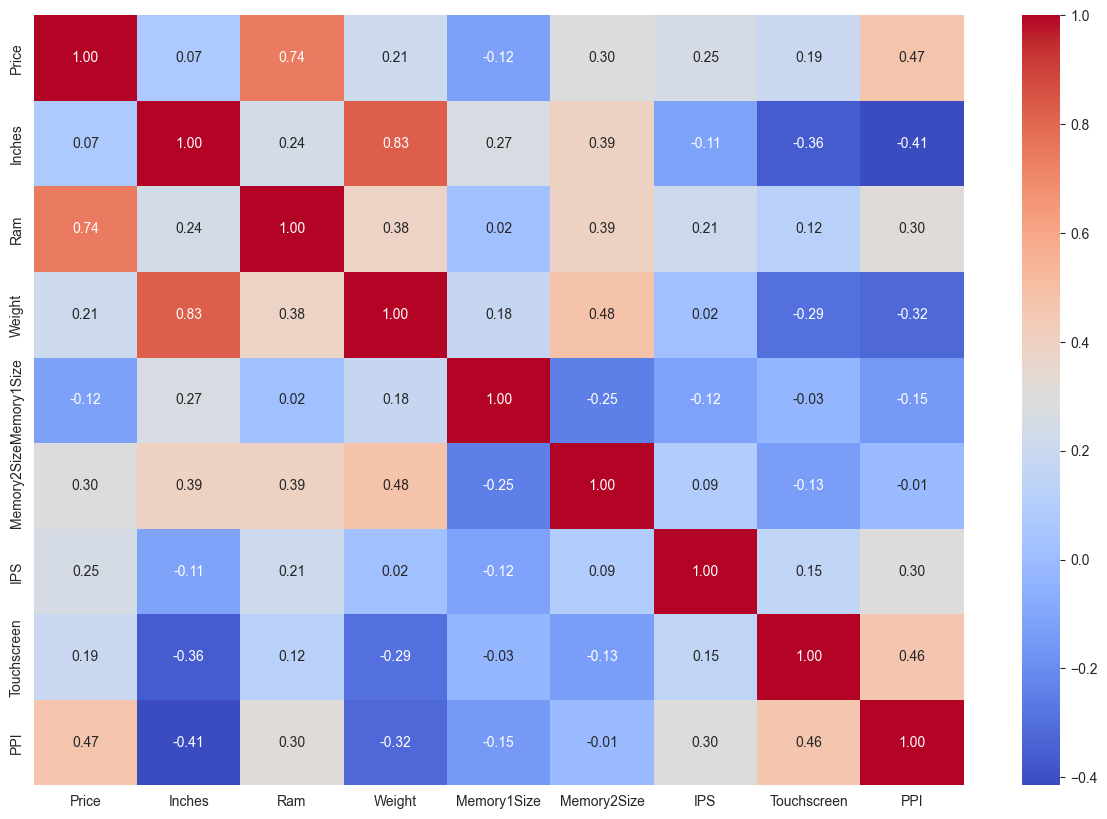

In [138]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

In [139]:
df.sample(20)

,Price,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Memory1Size,Memory1Type,Memory2Size,Memory2Type,IPS,Touchscreen,PPI
926,87912.0000,Lenovo,Ultrabook,12.5,Intel Core i7 7500U 2.7GHz,8,Intel HD Graphics 620,Windows 10,1.36,256.0,SSD,0.0,NaN,1,0,176.232574
830,292986.7200,Razer,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,32,Nvidia GeForce GTX 1080,Windows 10,3.49,512.0,SSD,0.0,NaN,0,1,254.671349
242,47365.9200,Asus,Notebook,17.3,Intel Core i7 7500U 2.7GHz,8,Nvidia GeForce GTX 950M,No OS,2.69,128.0,SSD,1000.0,HDD,0,0,127.335675
839,31435.2000,Asus,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Windows 10,2.30,128.0,HDD,0.0,NaN,0,0,141.211998
540,74538.7200,Dell,Ultrabook,13.3,Intel Core i7 8550U 1.8GHz,8,Intel UHD Graphics 620,Windows 10,1.20,256.0,SSD,0.0,NaN,0,1,276.053530
993,71874.7200,Lenovo,Notebook,15.6,Intel Core i5 6200U 2.3GHz,8,Intel HD Graphics 520,Windows 10,2.30,256.0,SSD,0.0,NaN,0,0,141.211998
496,47893.3920,Lenovo,Notebook,15.6,Intel Core i7 8550U 1.8GHz,8,Intel UHD Graphics 620,Windows 10,2.17,256.0,SSD,0.0,NaN,0,0,141.211998
289,35112.0528,Lenovo,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8,Nvidia GeForce 940MX,No OS,2.20,1000.0,HDD,0.0,NaN,0,0,141.211998
644,23976.0000,Acer,Notebook,15.6,Intel Core i3 6006U 2GHz,4,Intel HD Graphics 520,Windows 10,2.40,500.0,HDD,0.0,NaN,0,0,100.454670
337,60952.3200,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Windows 10,1.84,256.0,SSD,0.0,NaN,0,0,141.211998


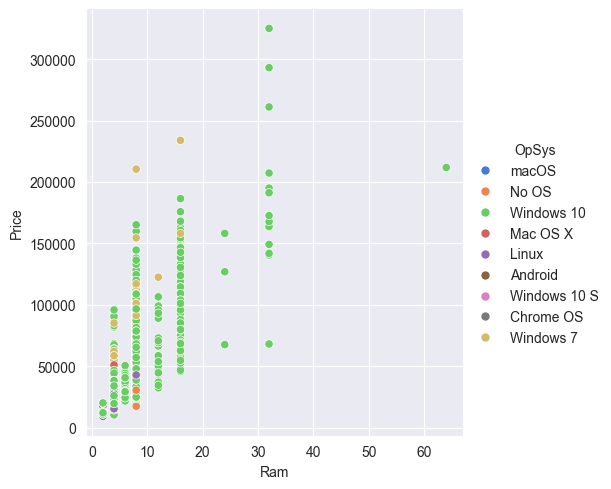

In [140]:
sns.relplot(data=df, x='Ram', y='Price', hue='OpSys', palette='muted')

### Removing Outliers

In [141]:
outliers = df.quantile(q = 0.97, numeric_only=True)

In [142]:
df = df[df['Price'] < outliers['Price']]
df = df[df['PPI'] < outliers['PPI']]

<Axes: xlabel='Price', ylabel='Count'>

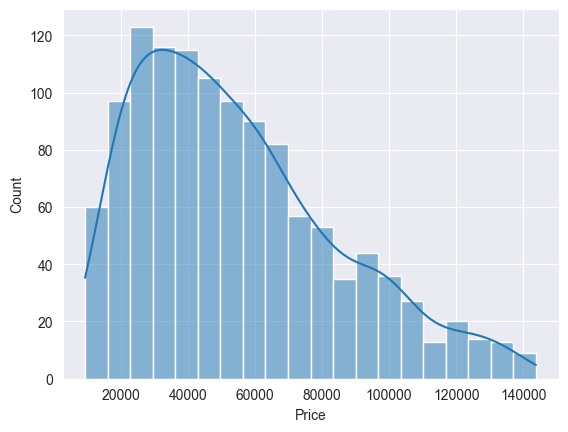

In [143]:
sns.histplot(df['Price'], kde=True, bins=20)

<Axes: xlabel='Price'>

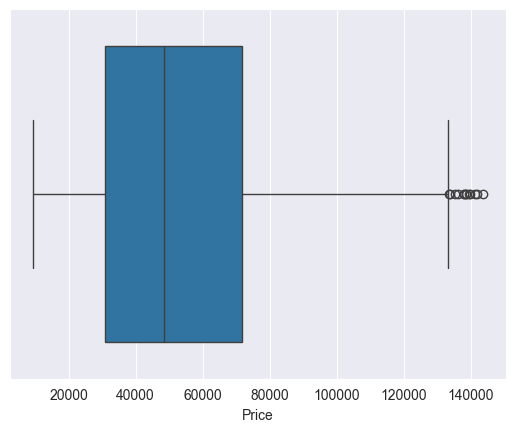

In [144]:
sns.boxplot(x=df.Price)

In [145]:
# since these columns are very important, we square them (yani karelerini alıyoruz)
df['Ram'] = df['Ram'] ** 2
df['PPI'] = df['PPI'] ** 2

### Modelling

In [146]:
x = df.drop(['Price'], axis=1)
y = df['Price']

In [147]:
x = pd.get_dummies(x, drop_first=True)

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
    #Bütün modelleri tanımlıyorum
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    sgd=SGDRegressor()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    kn=KNeighborsRegressor()
    rkn=RadiusNeighborsRegressor(radius=1.0)
    ada=AdaBoostRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
    svr=SVR()
    mlp_regressor = MLPRegressor()



    algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
    algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']

    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

    r_squared= []
    rmse= []
    mae= []

    #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)


    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test,p)**.5)
        mae.append(mean_absolute_error(y_test,p))



    #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
    rtable=result.sort_values('R_Squared',ascending=False)
    return rtable

In [149]:
x.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in x.columns]

In [150]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,8.434219e-01,1.204812e+04,8.165126e+03
Gradient Boosting,8.281247e-01,1.262293e+04,9.158486e+03
Lasso,7.843369e-01,1.413974e+04,9.835418e+03
Ridge,7.775108e-01,1.436177e+04,9.973107e+03
Linear,7.643765e-01,1.477961e+04,1.061409e+04
Extra Tree,7.336533e-01,1.571366e+04,1.012938e+04
AdaBoost,7.043321e-01,1.655601e+04,1.158463e+04
Decision Tree,7.017318e-01,1.662865e+04,1.109236e+04
KNeighborsRegressor,6.423456e-01,1.820897e+04,1.504999e+04
ElasticNet,6.133842e-01,1.893186e+04,1.399033e+04


### Featue Importance

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)
lr=LinearRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

r2_score(y_test, y_pred)

0.7643764676788062

In [152]:
feature_importance = pd.DataFrame({'feature': x_train.columns, 'Coefs': lr.coef_})
feature_importance = feature_importance.sort_values(by='Coefs', ascending=False)

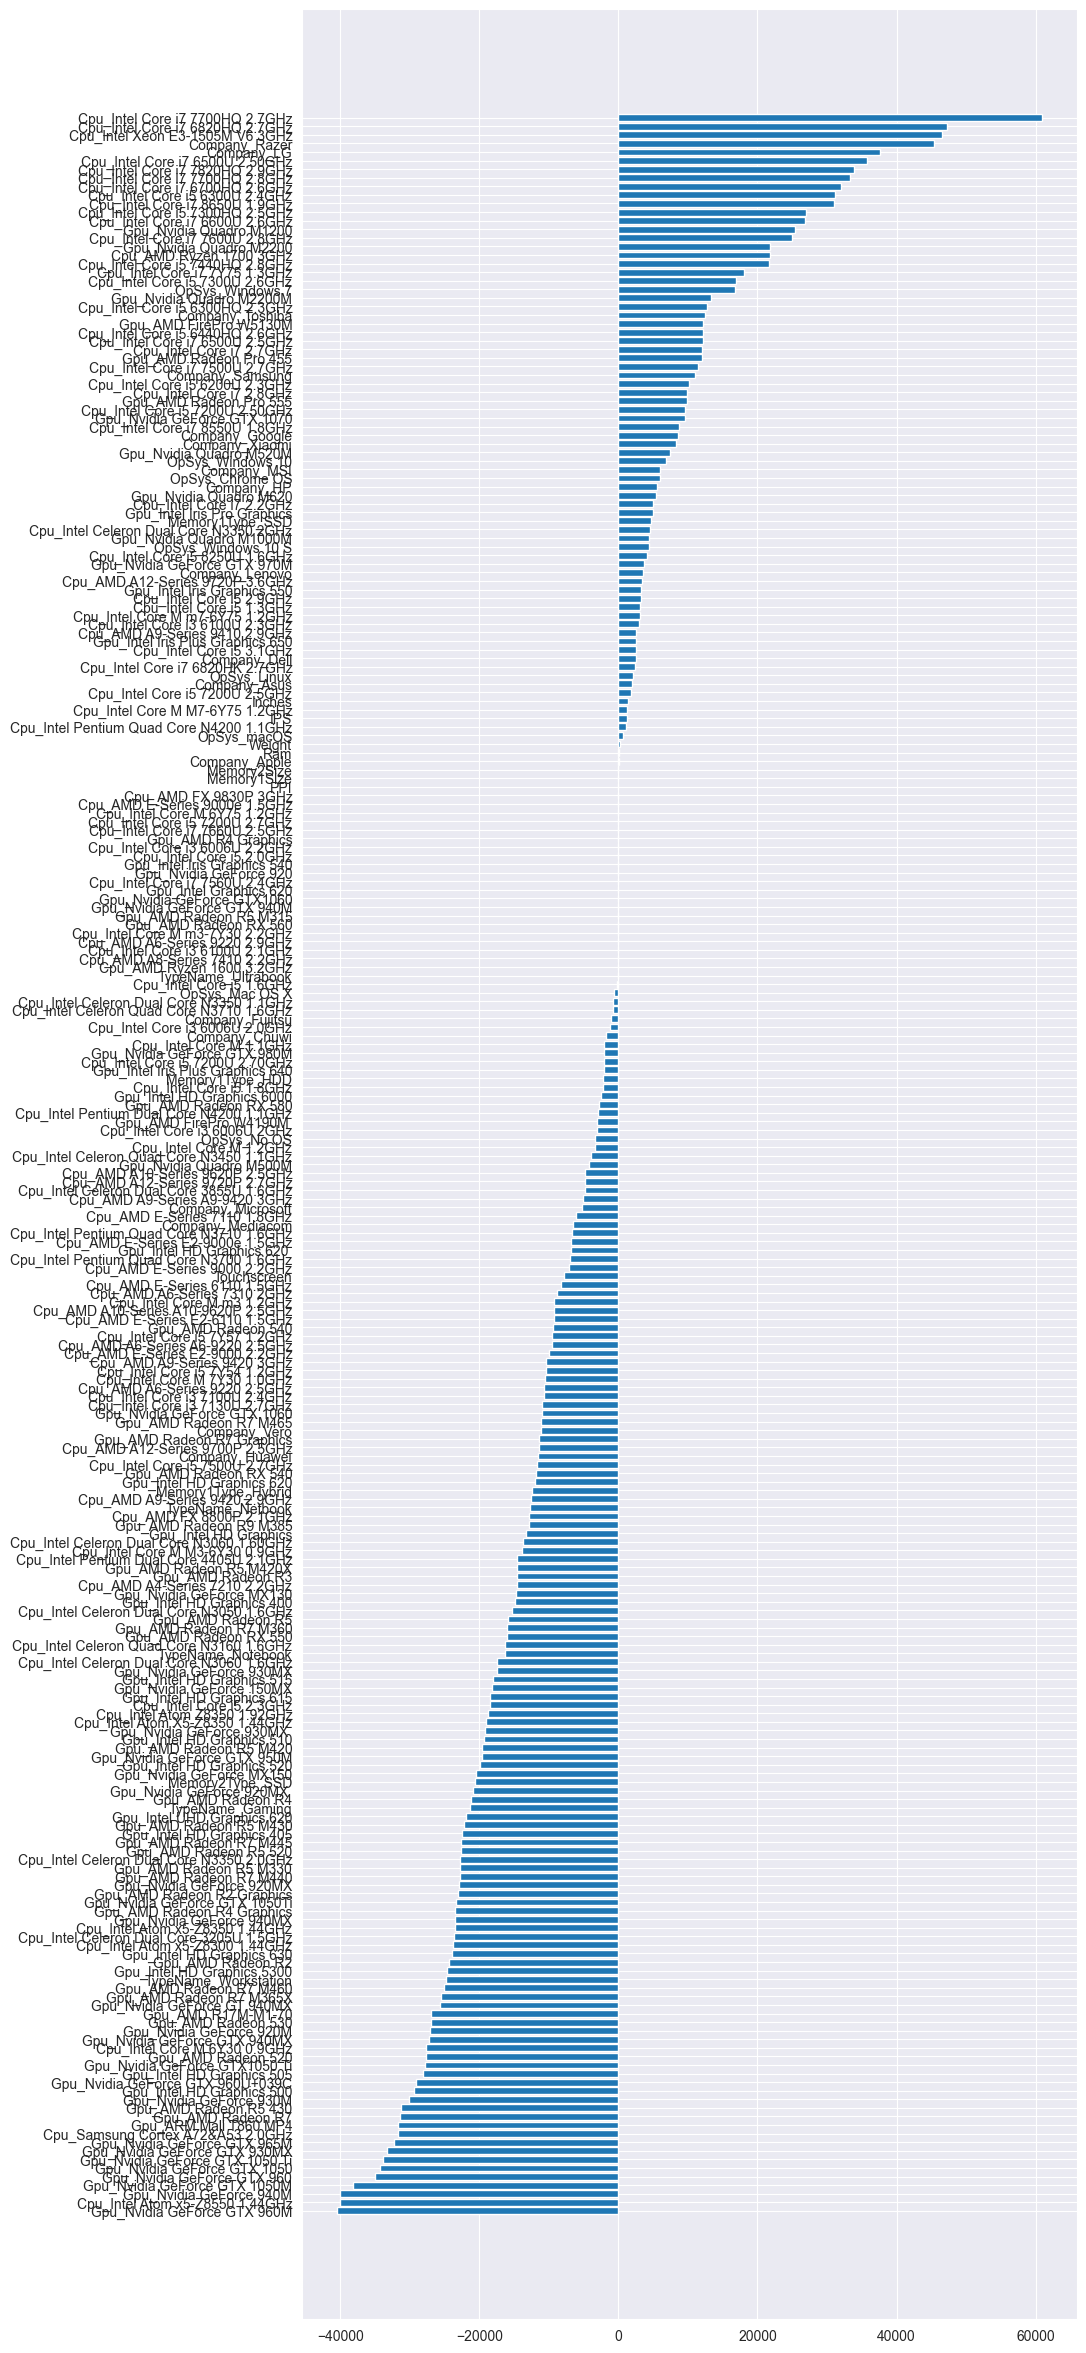

In [153]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 30))
plt.barh(feature_importance.feature, feature_importance.Coefs)
plt.gca().invert_yaxis()
plt.show()

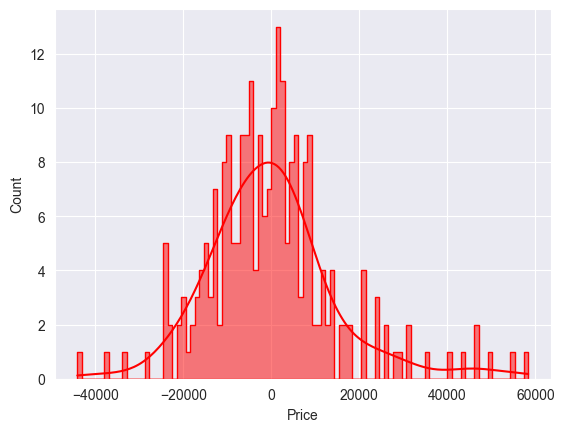

In [154]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=100, color='red', alpha=0.5, label='Residuals', element='step');